In [ ]:
from google.colab import files
upload=files.upload()

Saving ADA (2).csv to ADA (2).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Dropout


In [ ]:
df=pd.read_csv("ADA (2).csv")
df

,ticker,date,open,high,low,close
0,ADA,2017-12-30,0.495500,0.694100,0.420000,0.590000
1,ADA,2017-12-31,0.590000,0.740000,0.590000,0.710000
2,ADA,2018-01-01,0.710000,0.715000,0.632000,0.702200
3,ADA,2018-01-02,0.702200,0.800000,0.675000,0.762000
4,ADA,2018-01-03,0.762000,1.100000,0.760100,1.100000
...,...,...,...,...,...,...
2611,ADA,2025-04-11,0.603400,0.640985,0.601095,0.628616
2612,ADA,2025-04-12,0.627722,0.666767,0.616948,0.656157
2613,ADA,2025-04-13,0.657157,0.668120,0.630031,0.640358
2614,ADA,2025-04-14,0.639588,0.656930,0.628153,0.637471


In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  2616 non-null   object 
 1   date    2616 non-null   object 
 2   open    2616 non-null   float64
 3   high    2616 non-null   float64
 4   low     2616 non-null   float64
 5   close   2616 non-null   float64
dtypes: float64(4), object(2)
memory usage: 122.8+ KB


In [ ]:
#missing vallues
df.isnull().sum()

,0
ticker,0
date,0
open,0
high,0
low,0
close,0


In [ ]:
#finding duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:

# Feature engineering for ADA
df['ADA MA5'] = df['close'].rolling(window=5).mean()
df['ADA MA10'] = df['close'].rolling(window=10).mean()
df['ADA MA20'] = df['close'].rolling(window=20).mean()
df= df.dropna()

In [ ]:
df.head()

,ticker,date,open,high,low,close,ADA MA5,ADA MA10,ADA MA20
19,ADA,2018-01-18,0.6250,0.6996,0.6000,0.6500,0.69084,0.74947,0.822445
20,ADA,2018-01-19,0.6500,0.6964,0.5890,0.6441,0.65966,0.73288,0.825150
21,ADA,2018-01-20,0.6479,0.7263,0.6400,0.7048,0.64662,0.72571,0.824890
22,ADA,2018-01-21,0.7049,0.7049,0.5765,0.6100,0.64662,0.71871,0.820280
23,ADA,2018-01-22,0.6165,0.6400,0.5100,0.5675,0.63528,0.68596,0.810555


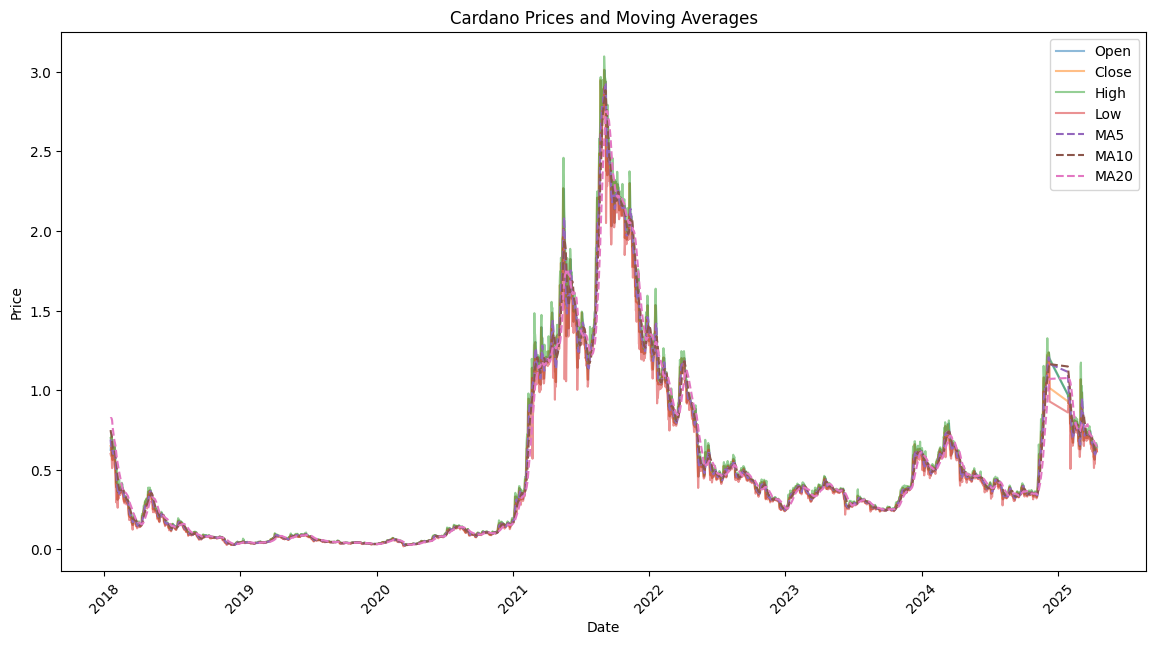

In [ ]:
# Parse the Date column to datetime
df.loc[:,'date'] = pd.to_datetime(df['date'])

# Plotting the data
plt.figure(figsize=(14, 7))

# Plot Open, Close, High, Low prices
plt.plot(df['date'], df['open'], label='Open', alpha=0.5)
plt.plot(df['date'], df['close'], label='Close', alpha=0.5)
plt.plot(df['date'], df['high'], label='High', alpha=0.5)
plt.plot(df['date'], df['low'], label='Low', alpha=0.5)

# Plot Moving Averages
plt.plot(df['date'], df['ADA MA5'], label='MA5', linestyle='--')
plt.plot(df['date'], df['ADA MA10'], label='MA10', linestyle='--')
plt.plot(df['date'], df['ADA MA20'], label='MA20', linestyle='--')

# Add titles and labels
plt.title('Cardano Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [ ]:
# Create the target variable (next day's closing price)
df.loc[:,'Next_Close'] = df['close'].shift(-1)
df= df.dropna()

<ipython-input-11-57d74d2d530e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Next_Close'] = df['close'].shift(-1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2596 entries, 19 to 2614
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ticker      2596 non-null   object 
 1   date        2596 non-null   object 
 2   open        2596 non-null   float64
 3   high        2596 non-null   float64
 4   low         2596 non-null   float64
 5   close       2596 non-null   float64
 6   ADA MA5     2596 non-null   float64
 7   ADA MA10    2596 non-null   float64
 8   ADA MA20    2596 non-null   float64
 9   Next_Close  2596 non-null   float64
dtypes: float64(8), object(2)
memory usage: 223.1+ KB


In [ ]:
# Select features and target
df_features = df[['open', 'low', 'high', 'close', 'ADA MA5', 'ADA MA10', 'ADA MA20']]
df_target = df['Next_Close']

In [ ]:
df_features.shape

(2596, 7)

In [ ]:
df_target

,Next_Close
19,0.644100
20,0.704800
21,0.610000
22,0.567500
23,0.560100
...,...
2610,0.628616
2611,0.656157
2612,0.640358
2613,0.637471


In [ ]:
df_target.shape

(2596,)

In [ ]:
print(f'Cardano (df) Features Shape: {df_features.shape}')
print(f'Cardano (df) Target Shape: {df_target.shape}')

Cardano (df) Features Shape: (2596, 7)
Cardano (df) Target Shape: (2596,)


In [ ]:
# Normalizing the features
df_scaler = MinMaxScaler()

df_features_scaled = df_scaler.fit_transform(df_features)

df_features_scaled

array([[0.20120472, 0.2013272 , 0.21920748, ..., 0.22912335, 0.25269146,
        0.29152756],
       [0.20957082, 0.1975174 , 0.2181653 , ..., 0.21838037, 0.24688486,
        0.29252086],
       [0.20886807, 0.21518102, 0.22790322, ..., 0.21388747, 0.24437531,
        0.29242538],
       ...,
       [0.20211562, 0.20719706, 0.20851433, ..., 0.20442626, 0.20779691,
        0.23181143],
       [0.21196587, 0.2117283 , 0.20895498, ..., 0.20970377, 0.20780395,
        0.23017462],
       [0.20608651, 0.21107786, 0.20531059, ..., 0.20924311, 0.20692368,
        0.22822506]])

In [ ]:
df_features_scaled.shape

(2596, 7)

In [ ]:
# Normalizing Targets

df_target_scaler = MinMaxScaler()

target_df = df_target.values.reshape(-1, 1)
df_target_scaled = df_target_scaler.fit_transform(target_df)

In [ ]:
df_target_scaled

array([[0.20752697],
       [0.22783307],
       [0.19611943],
       ...,
       [0.20627515],
       [0.20530936],
       [0.19832834]])

In [ ]:
df_target_scaled.shape

(2596, 1)

In [ ]:
#Train-test split
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(df_features_scaled, df_target_scaled, test_size=0.2, random_state=42)

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu',))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_squared_error'])

In [ ]:
# Train the model
df_history = model.fit(X_train_df, y_train_df, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0625 - mean_squared_error: 0.0144 - val_loss: 0.0180 - val_mean_squared_error: 8.1662e-04
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0312 - mean_squared_error: 0.0035 - val_loss: 0.0191 - val_mean_squared_error: 0.0010
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0256 - mean_squared_error: 0.0023 - val_loss: 0.0162 - val_mean_squared_error: 8.5908e-04
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0240 - mean_squared_error: 0.0021 - val_loss: 0.0121 - val_mean_squared_error: 5.9778e-04
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0216 - mean_squared_error: 0.0017 - val_loss: 0.0235 - val_mean_squared_error: 0.0019
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0236 - mean_squared_error: 0.0017 - val_loss: 0.0153 - val_mean_squared_error: 7.1212e-04
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0247 - mean_squared_error: 0.0021 - val_l

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
import math
# Make predictions using the trained model on the test data
predicted = model.predict(X_test_df)
#Calculate R2 score
R2 = r2_score(y_test_df, predicted)
print("THE R2 SCORE IS :", R2)
#MEAN SQUARE ERROR
MSE = mean_squared_error(y_test_df,predicted)
print("THE MEAN_SQUARE_ERROR SCORE IS:",MSE)
#MEAN ABSOLUTE ERROR
MAE = median_absolute_error(y_test_df,predicted)
print("THE MEAN_ABSOLUTE_ERROR SCORE IS :",MAE)
#ROOT MEAN SQUARE ERROR
RMSE = math.sqrt(MSE)
print("THE ROOT_MEAN_ABSOLUTE_ERROR IS :",RMSE)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
THE R2 SCORE IS : 0.9613408876022285
THE MEAN_SQUARE_ERROR SCORE IS: 0.0011999020847303949
THE MEAN_ABSOLUTE_ERROR SCORE IS : 0.010563137416697246
THE ROOT_MEAN_ABSOLUTE_ERROR IS : 0.034639602837365134


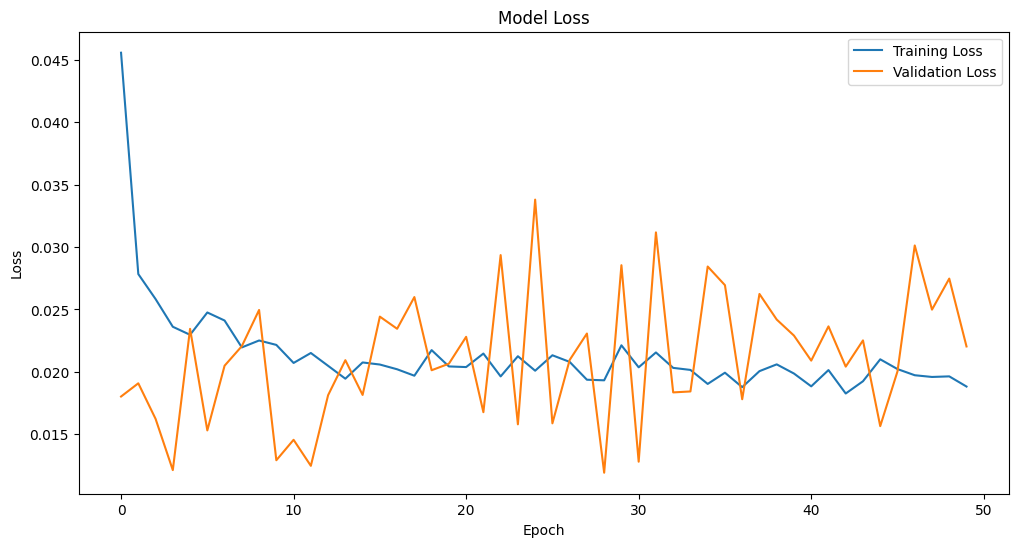

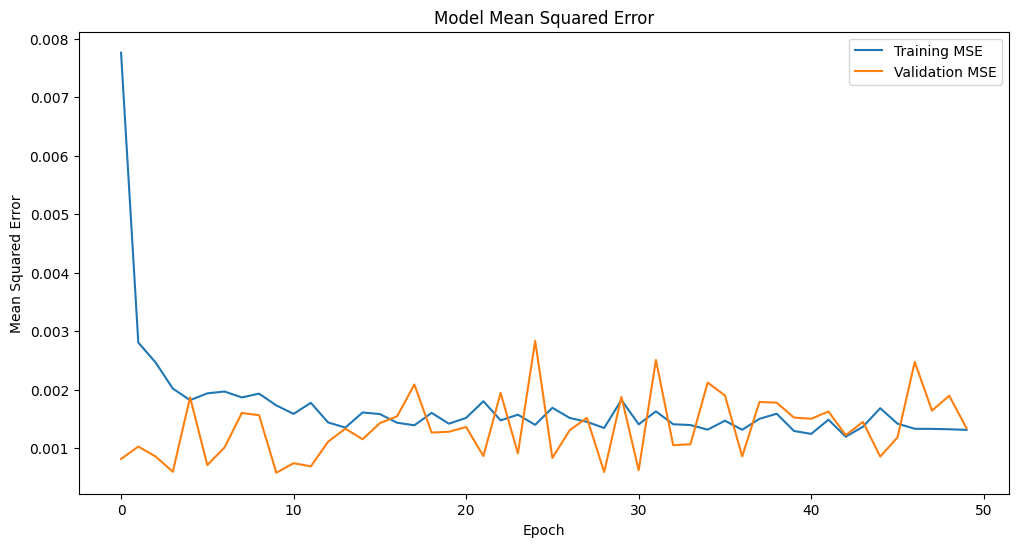

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(df_history.history['loss'], label='Training Loss')
plt.plot(df_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot training & validation mean squared error values
plt.figure(figsize=(12, 6))
plt.plot(df_history.history['mean_squared_error'], label='Training MSE')
plt.plot(df_history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(['Training MSE', 'Validation MSE'], loc='upper right')
plt.show()


In [ ]:
# Evaluate the model
loss = model.evaluate(X_test_df, y_test_df)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test_df)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0221 - mean_squared_error: 0.0013 
Test Loss: [0.021378397941589355, 0.0011999020352959633]
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


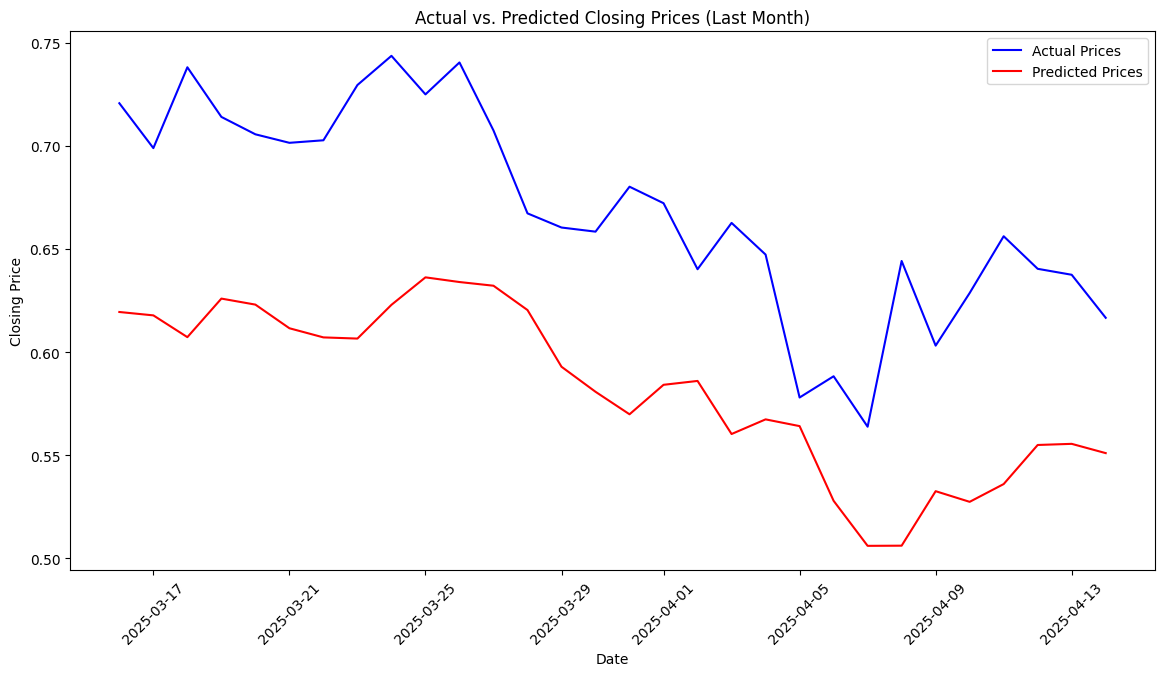

In [ ]:
# Select the last month's data for prediction
last_month_data = df_features[-30:]  # Assuming 30 days in a month. Adjust as needed

# Scale the last month's data
last_month_scaled = df_scaler.transform(last_month_data)

# Make predictions on the scaled last month's data
predictions_scaled = model.predict(last_month_scaled)

# Inverse transform the scaled predictions to get actual price predictions
predictions = df_target_scaler.inverse_transform(predictions_scaled)

# Get the actual closing prices for the last month
actual_prices = df['Next_Close'][-30:].values

# Create the date range for the plot (assuming your data has a date column)
date_range = df['date'][-30:]


# Plot actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(date_range, actual_prices, label='Actual Prices', color='blue')
plt.plot(date_range, predictions, label='Predicted Prices', color='red')
plt.title('Actual vs. Predicted Closing Prices (Last Month)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:

df_new_data = df_features_scaled[-2].reshape(1, -1)

# Inverse transform the predicted value to get the original scale
predicted_original = df_target_scaler.inverse_transform( model.predict(df_new_data))

print(f'Predicted next closing price: {predicted_original[0][0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted next closing price: 0.555463969707489


In [ ]:

# Convert to sequences
def create_sequences(features, target, n_steps):
    X, y = [], []
    for i in range(len(features) - n_steps):
        X.append(features[i:i + n_steps])
        y.append(target[i + n_steps])
    return np.array(X), np.array(y)

# Define the sequence length (e.g., 60 days)
n_steps = 30

# Create sequences
X_df, y_df = create_sequences(df_features_scaled, df_target_scaled, n_steps)

# Train-test split
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train_df.shape}')
print(f'y_train shape: {y_train_df.shape}')
print(f'X_test shape: {X_test_df.shape}')
print(f'y_test shape: {y_test_df.shape}')



X_train shape: (2052, 30, 7)
y_train shape: (2052, 1)
X_test shape: (514, 30, 7)
y_test shape: (514, 1)


In [ ]:

# Build the LSTM model
df_LSTM_model = Sequential()
df_LSTM_model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train_df.shape[1], X_train_df.shape[2])))
df_LSTM_model.add(Dropout(0.1))
df_LSTM_model.add(LSTM(units=64, return_sequences=True))
df_LSTM_model.add(Dropout(0.1))
df_LSTM_model.add(Dense(units=32, activation='relu'))
df_LSTM_model.add(Dense(units=1))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
df_LSTM_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
df_LSTM_history = df_LSTM_model.fit(X_train_df, y_train_df, epochs=50, batch_size=64, validation_split=0.2)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 277ms/step - loss: 0.0157 - val_loss: 0.0071
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - loss: 0.0043 - val_loss: 0.0048
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0044 - val_loss: 0.0052
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0043 - val_loss: 0.0048
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - loss: 0.0036 - val_loss: 0.0040
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0033 - val_loss: 0.0039
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - loss: 0.0038 - val_loss: 0.0041
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step 

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
import math
# Make predictions using the trained LSTM model on the test data
# Changed 'model' to 'df_LSTM_model' to use the LSTM model
predicted = df_LSTM_model.predict(X_test_df)

# Reshape the predicted values to 2D
# Taking the last prediction from each sequence
predicted = predicted[:, -1]  # Select the last timestep's prediction

# Reshape to (number_of_samples, 1)
predicted = predicted.reshape(-1, 1)
y_test_df = y_test_df.reshape(-1, 1)


#Calculate R2 score
R2 = r2_score(y_test_df, predicted)
print("THE R2 SCORE IS :", R2)
#MEAN SQUARE ERROR
MSE = mean_squared_error(y_test_df,predicted)
print("THE MEAN_SQUARE_ERROR SCORE IS:",MSE)
#MEAN ABSOLUTE ERROR
MAE = median_absolute_error(y_test_df,predicted)
print("THE MEAN_ABSOLUTE_ERROR SCORE IS :",MAE)
#ROOT MEAN SQUARE ERROR
RMSE = math.sqrt(MSE)
print("THE ROOT_MEAN_ABSOLUTE_ERROR IS :",RMSE)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
THE R2 SCORE IS : 0.9829812028591303
THE MEAN_SQUARE_ERROR SCORE IS: 0.0006283812380940941
THE MEAN_ABSOLUTE_ERROR SCORE IS : 0.0055109891760980745
THE ROOT_MEAN_ABSOLUTE_ERROR IS : 0.02506753354628441


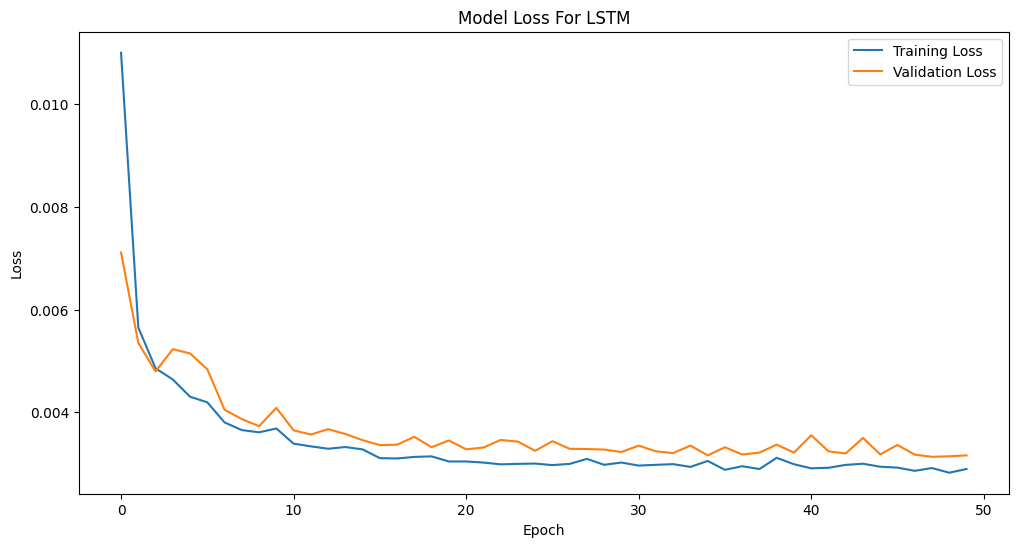

In [ ]:


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_LSTM_history.history['loss'], label='Training Loss')
plt.plot(df_LSTM_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss For LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Build the GRU model
df_GRU_model = Sequential()
df_GRU_model.add(GRU(units=128, return_sequences=True, input_shape=(X_train_df.shape[1], X_train_df.shape[2])))
df_GRU_model.add(Dropout(0.2))  # Adding dropout for regularization
df_GRU_model.add(GRU(units=64))  # Second GRU layer, no need for return_sequences as it's the last recurrent layer
df_GRU_model.add(Dropout(0.2))
df_GRU_model.add(Dense(units=1)) # Output layer

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
df_GRU_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
df_GRU_history = df_GRU_model.fit(X_train_df, y_train_df, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - loss: 0.0151 - val_loss: 0.0013
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 0.0017 - val_loss: 8.5618e-04
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 0.0014 - val_loss: 7.9765e-04
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0011 - val_loss: 6.8228e-04
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0010 - val_loss: 6.7634e-04
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0012 - val_loss: 5.3584e-04
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 8.2538e-04 - val_loss: 5.3194e-04
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - loss: 7.7389e-04 - val_loss: 5.2742e-04
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 9.3491e-04 - val_loss: 4.9835e-04
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 9.0144e-04 - val_loss: 9.3467e-04
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - loss: 0.0012 - val_loss: 6.4739e-04
Epoch 12/5

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
import math

# Make predictions using the trained GRU model on the test data
predicted_GRU = df_GRU_model.predict(X_test_df)

# Reshape predictions to 2D
predicted_GRU = predicted_GRU.reshape(-1, 1)

#Calculate R2 score
R2 = r2_score(y_test_df, predicted)
print("THE R2 SCORE IS :", R2)
#MEAN SQUARE ERROR
MSE = mean_squared_error(y_test_df,predicted)
print("THE MEAN_SQUARE_ERROR SCORE IS:",MSE)
#MEAN ABSOLUTE ERROR
MAE = median_absolute_error(y_test_df,predicted)
print("THE MEAN_ABSOLUTE_ERROR SCORE IS :",MAE)
#ROOT MEAN SQUARE ERROR
RMSE = math.sqrt(MSE)
print("THE ROOT_MEAN_ABSOLUTE_ERROR IS :",RMSE)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
THE R2 SCORE IS : 0.9829812028591303
THE MEAN_SQUARE_ERROR SCORE IS: 0.0006283812380940941
THE MEAN_ABSOLUTE_ERROR SCORE IS : 0.0055109891760980745
THE ROOT_MEAN_ABSOLUTE_ERROR IS : 0.02506753354628441


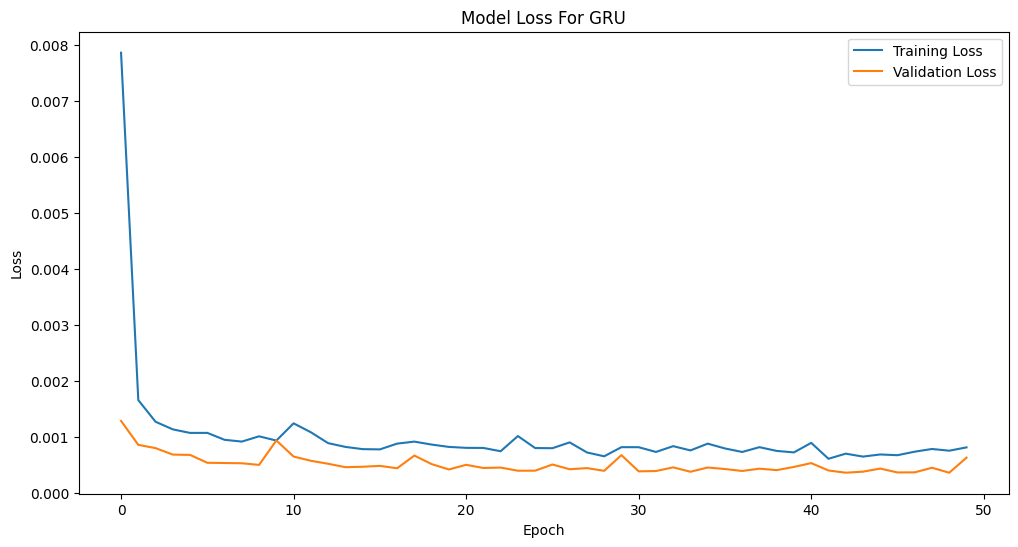

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_GRU_history.history['loss'], label='Training Loss')
plt.plot(df_GRU_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss For GRU')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
# Initialize the linear regression model
linear_model = LinearRegression()
# Reshape X_train_df and X_test_df to 2D for Linear Regression
X_train_df_2d = X_train_df.reshape(X_train_df.shape[0], -1)  # Reshape to (num_samples, num_features)
X_test_df_2d = X_test_df.reshape(X_test_df.shape[0], -1)    # Reshape to (num_samples, num_features)
# Fit the model to the training data
linear_model.fit(X_train_df_2d, y_train_df)
# Make predictions on the test data
linear_predictions = linear_model.predict(X_test_df_2d)
# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math
# Calculate R2 score
linear_r2 = r2_score(y_test_df, linear_predictions)
print("Linear Regression R2 Score:", linear_r2)
# Calculate Mean Squared Error
linear_mse = mean_squared_error(y_test_df, linear_predictions)
print("Linear Regression Mean Squared Error:", linear_mse)
# Calculate Mean Absolute Error
linear_mae = mean_absolute_error(y_test_df, linear_predictions)
print("Linear Regression Mean Absolute Error:", linear_mae)
# Calculate Root Mean Squared Error
linear_rmse = math.sqrt(linear_mse)
print("Linear Regression Root Mean Squared Error:", linear_rmse)

Linear Regression R2 Score: 0.9808489947168105
Linear Regression Mean Squared Error: 0.0007071082821533752
Linear Regression Mean Absolute Error: 0.011968620914643315
Linear Regression Root Mean Squared Error: 0.02659150770741244


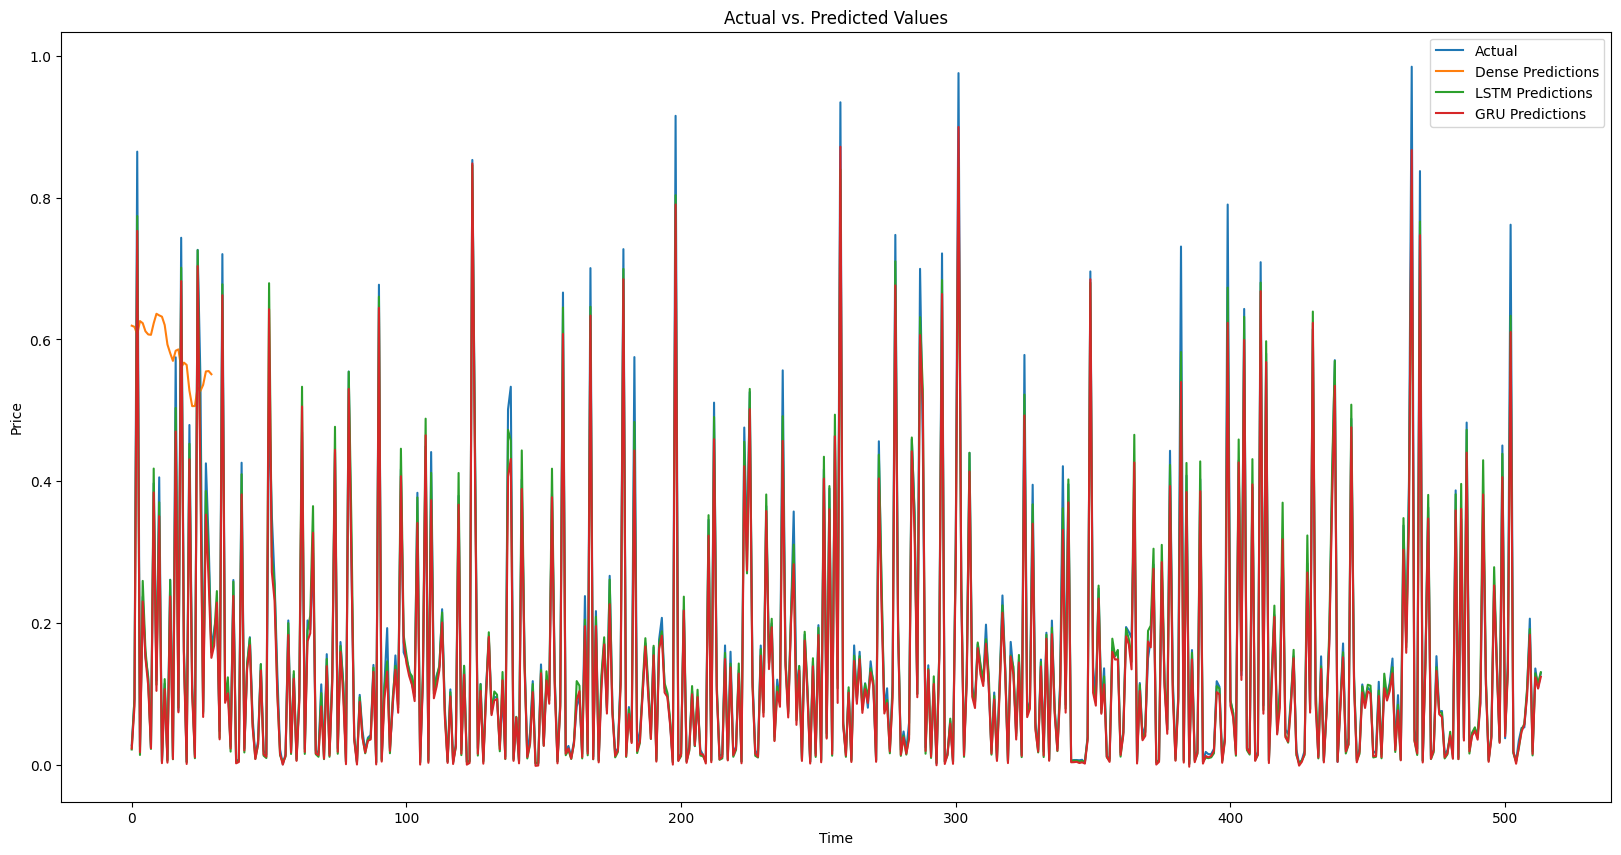

In [ ]:
# Assuming 'predicted_dense', 'predicted_lstm', 'predicted_gru' hold the predictions
plt.figure(figsize=(20, 10))
plt.plot(y_test_df, label='Actual')
plt.plot(predictions, label='Dense Predictions') # Changed 'predicted_dense' to 'predictions'
plt.plot(predicted[:, -1], label='LSTM Predictions')  # Adjust for LSTM output shape, using 'predicted' from LSTM section
plt.plot(predicted_GRU, label='GRU Predictions')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

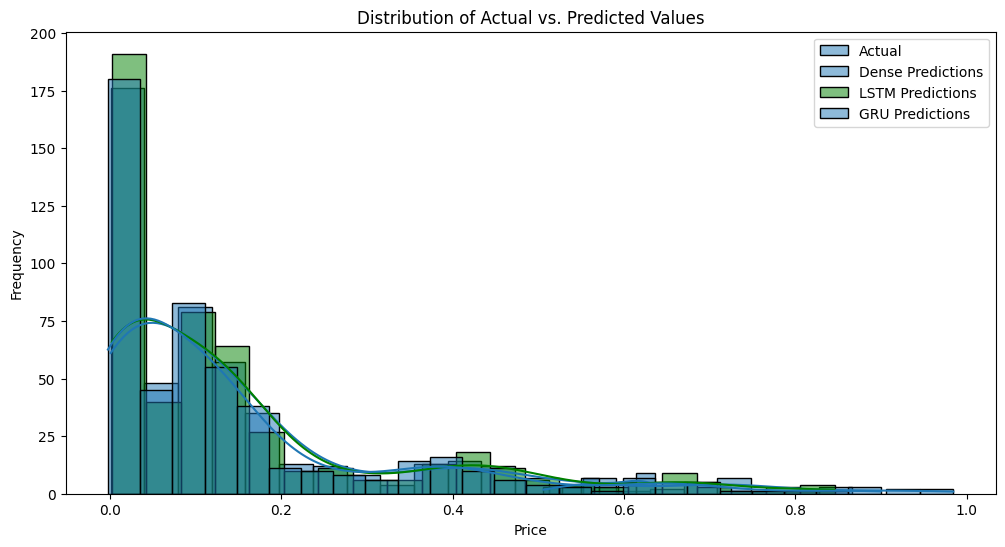

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Distribution of actual values
sns.histplot(y_test_df, kde=True, label='Actual', color='yellow')

# Distribution of predicted values (Dense model)
sns.histplot(predictions, kde=True, label='Dense Predictions', color='blue')

# Distribution of predicted values (LSTM model)
sns.histplot(predicted[:, -1], kde=True, label='LSTM Predictions', color='green')

# Distribution of predicted values (GRU model)
sns.histplot(predicted_GRU, kde=True, label='GRU Predictions', color='red')

plt.title('Distribution of Actual vs. Predicted Values')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# prompt: which models gives me best accuracy

# Assuming 'predicted_dense', 'predicted_lstm', 'predicted_gru', and 'y_test_df' are defined from the previous code

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

# ... (rest of your code above this part remains the same) ...

# Reshape and scale X_test_df for the Dense model
# Assuming your original X_test_df had shape (samples, timesteps, features)
num_samples = X_test_df.shape[0]
num_timesteps = X_test_df.shape[1]
num_features = X_test_df.shape[2]  # Original number of features (7 in your case)

# Reshape to (samples, timesteps * features)
X_test_df_2d = X_test_df.reshape(num_samples, num_timesteps * num_features)

# Create a new scaler and fit on the reshaped training data
# OR
# Extract the last timestep's data to get the original number of features
X_test_df_2d_last_timestep = X_test_df[:, -1, :]  # Shape: (num_samples, num_features)

# Scale the last timestep's data
X_test_df_2d_scaled = df_scaler.transform(X_test_df_2d_last_timestep)

predictions_dense = model.predict(X_test_df_2d_scaled)  # Use the reshaped and scaled data

# ... (rest of your code remains the same) ...# Use the reshaped data for prediction  # Use X_test_df for consistent shape

# Evaluate Dense Model
dense_r2 = r2_score(y_test_df, predictions_dense)
dense_mse = mean_squared_error(y_test_df, predictions_dense)
dense_mae = mean_absolute_error(y_test_df, predictions_dense)
dense_rmse = math.sqrt(dense_mse)

print("Dense Model:")
print(f"R2 Score: {dense_r2}")
print(f"MSE: {dense_mse}")
print(f"MAE: {dense_mae}")
print(f"RMSE: {dense_rmse}")

# Evaluate LSTM Model (assuming 'df_LSTM_model' is your LSTM model and 'predicted' is from the LSTM section)
lstm_r2 = r2_score(y_test_df, predicted[:, -1])  # Use predicted from the LSTM section
lstm_mse = mean_squared_error(y_test_df, predicted[:, -1])
lstm_mae = mean_absolute_error(y_test_df, predicted[:, -1])
lstm_rmse = math.sqrt(lstm_mse)

print("\nLSTM Model:")
print(f"R2 Score: {lstm_r2}")
print(f"MSE: {lstm_mse}")
print(f"MAE: {lstm_mae}")
print(f"RMSE: {lstm_rmse}")

# Evaluate GRU Model (assuming 'df_GRU_model' is your GRU model and 'predicted_GRU' is from the GRU section)
gru_r2 = r2_score(y_test_df, predicted_GRU)
gru_mse = mean_squared_error(y_test_df, predicted_GRU)
gru_mae = mean_absolute_error(y_test_df, predicted_GRU)
gru_rmse = math.sqrt(gru_mse)

print("\nGRU Model:")
print(f"R2 Score: {gru_r2}")
print(f"MSE: {gru_mse}")
print(f"MAE: {gru_mae}")
print(f"RMSE: {gru_rmse}")

# Evaluate Linear Regression Model
linear_r2 = r2_score(y_test_df, linear_predictions)
linear_mse = mean_squared_error(y_test_df, linear_predictions)
linear_mae = mean_absolute_error(y_test_df, linear_predictions)
linear_rmse = math.sqrt(linear_mse)

print("\nLinear Regression Model:")
print(f"R2 Score: {linear_r2}")
print(f"MSE: {linear_mse}")
print(f"MAE: {linear_mae}")
print(f"RMSE: {linear_rmse}")

models = {
    "Dense": {"r2": dense_r2, "mse": dense_mse, "mae": dense_mae, "rmse": dense_rmse},
    "LSTM": {"r2": lstm_r2, "mse": lstm_mse, "mae": lstm_mae, "rmse": lstm_rmse},
    "GRU": {"r2": gru_r2, "mse": gru_mse, "mae": gru_mae, "rmse": gru_rmse},
    "Linear Regression": {"r2": linear_r2, "mse": linear_mse, "mae": linear_mae, "rmse": linear_rmse},
}

# Find the best model based on the R^2 score (higher is better).
best_model = max(models, key=lambda k: models[k]["r2"])
print(f"\nBest model based on R2 score: {best_model} with R2 = {models[best_model]['r2']}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Dense Model:
R2 Score: 0.12812019820346654
MSE: 0.032192222798546236
MAE: 0.11153474357506271
RMSE: 0.17942191281598308

LSTM Model:
R2 Score: 0.9829812028591303
MSE: 0.0006283812380940941
MAE: 0.012533075180841251
RMSE: 0.02506753354628441

GRU Model:
R2 Score: 0.9775161103334421
MSE: 0.0008301676263543905
MAE: 0.01538677492247374
RMSE: 0.02881262963275637

Linear Regression Model:
R2 Score: 0.9808489947168105
MSE: 0.0007071082821533752
MAE: 0.011968620914643315
RMSE: 0.02659150770741244

Best model based on R2 score: LSTM with R2 = 0.9829812028591303


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# ================================
# Future 15 Days Prediction
# ================================

future_predictions = []
# Get the last 30 days of data (assuming your sequence length is 30)
last_sequence_2d = df_features_scaled[-30:]

for _ in range(15):
    # Extract the last day's features (the last row of last_sequence_2d)
    last_day_features = last_sequence_2d[-1].reshape(1, -1) # Reshape to (1, num_features)

    next_pred_scaled = model.predict(last_day_features)
    future_predictions.append(next_pred_scaled[0, 0])  # assuming your model outputs (batch, 1)

    # Prepare the next input
    # Update last_sequence_2d with the predicted value
    # (This part might need adjustment based on how you want to update features for future predictions)
    last_sequence_2d = np.roll(last_sequence_2d, -1, axis=0)  # Shift data by one step
    last_sequence_2d[-1] = np.concatenate([last_day_features[0, :-1], next_pred_scaled[0]])  # Update features with prediction

# (Optional) Inverse transform if needed
# Assuming df_target_scaler is your original scaler
future_predictions_real = df_target_scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Display
print("Future 15 Days Predictions (scaled):")
print(future_predictions)

print("Future 15 Days Predictions (real values):")
print(future_predictions_real.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Future 15 Days Predictions (scaled):
[np.float32(0.17637074), np.float32(0.17883575), np.float32(0.17861608), np.float32(0.17863563), np.float32(0.17863388), np.float32(0.17863405), np.float32(0.17863403), np.float32(0.17863403), np.float32(0.17863403), np.float32(0.17863403), np.float32(0.17863403), np.float32(0.17863403), np.float32(0.17863403), np.float32(0.17863403), np.float32(0.17863403)]
Future 15 Days Prediction

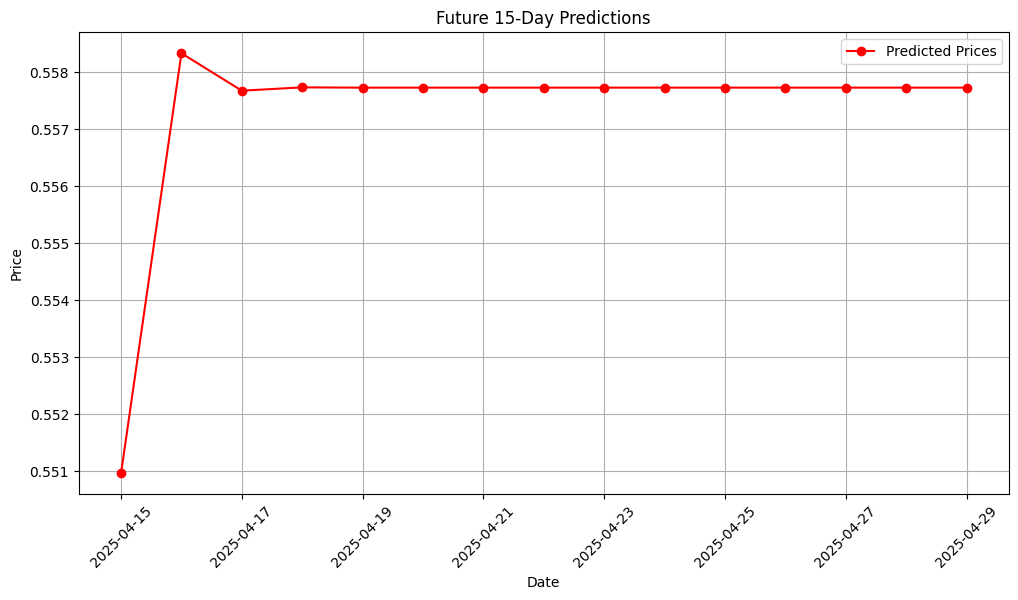

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a date range for plotting future predictions
future_dates = pd.date_range(start=df['date'].iloc[-1], periods=16, freq='D')[1:]  # Start from last known date

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_predictions_real, marker='o', linestyle='-', color='red', label='Predicted Prices')
plt.title("Future 15-Day Predictions")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
